<a href="https://colab.research.google.com/github/filiperobotic/cursoDL/blob/master/codes/aula2/mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nesse exercício, nós treinamos uma rede MLP para classificar imagens da base MNIST.

### 1. Carregar a base MNIST

In [0]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

### 2. Visualizar as 6 primeiras imagens de treinamento

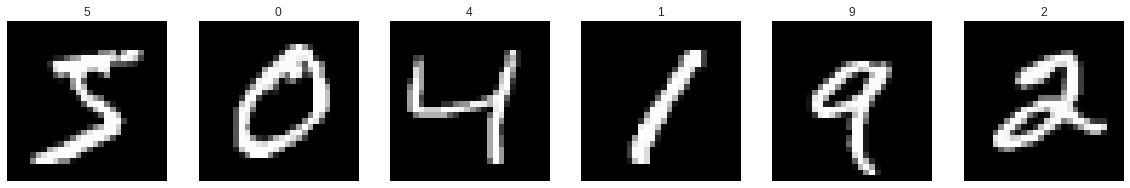

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. Ver a imagem em mais detalhes

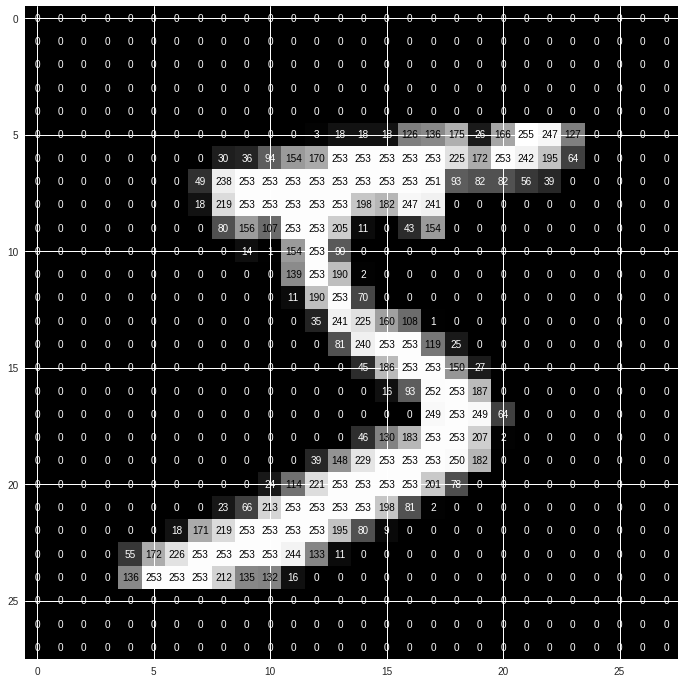

In [0]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

### 4. Reescalar as imagens dividindo cada pixel da imagem por 255

In [0]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### 5. Codificar os rótulos usando o One-Hot Encoding

In [0]:
#from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
X_train = X_train.reshape((X_train.shape[0], 28*28*1))
X_test = X_test.reshape((X_test.shape[0], 28 *28*1))

# one-hot encode the labels
#y_train = np_utils.to_categorical(y_train, 10)
#y_test = np_utils.to_categorical(y_test, 10)

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

### 6. Definir o Modelo de Arquitetura

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

# summarize the model
model.summary()

### 7. Compilar o Modelo

In [0]:
from keras.optimizers import SGD

# compile the model
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
              metrics=['accuracy'])

### 8. Calcular a acurácia de classificação no conjunto de teste (antes do treinamento)

In [0]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 9.5800%


### 9. Treinar o Modelo

In [0]:
# train the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
     epochs=100, batch_size=128)

### 11. Avaliando o modelo no conjunto de teste

In [0]:
from sklearn.metrics import classification_report

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(X_test, batch_size=128)
print(classification_report(y_test.argmax(axis=1),
     predictions.argmax(axis=1),
     target_names=[str(x) for x in lb.classes_]))

In [0]:
import matplotlib.pyplot as plt

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,100), hist.history["loss"],label="train_loss")
plt.plot(np.arange(0,100), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,100), hist.history["acc"],label="train_acc")
plt.plot(np.arange(0,100), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
